### Adj close移動平均

In [1]:
%matplotlib inline

import requests
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

In [14]:
site = "https://query1.finance.yahoo.com/v7/finance/download/2308.TW?period1=1549258857&period2=1549278857&interval=1d&events=history&crumb=hP2rOschxO0"
response = requests.post(site)

    1) index_col是將Date這個column當作是index
    2) parse_dates是將Date轉換成程式瞭解的日期格式，而非單純的字串

In [15]:
df = pd.read_csv(StringIO(response.text), index_col = 'Date', parse_dates=['Date'])
df = df.drop('Volume', axis = 1)

ValueError: 'Date' is not in list

In [16]:
ma_list = [5, 20, 60]

In [17]:
for ma in ma_list:
    df['MA_' + str(ma)] = df['Adj Close'].rolling(ma).mean()

In [18]:
df

,Open,High,Low,Close,Adj Close,MA_5,MA_20,MA_60
Date,,,,,,,,
2000-01-04,44.347500,46.278099,44.347500,45.154800,18.882399,NaN,NaN,NaN
2000-01-05,44.347500,45.312801,43.869099,44.189499,18.478735,NaN,NaN,NaN
2000-01-06,44.672100,46.918800,44.672100,46.918800,19.620052,NaN,NaN,NaN
2000-01-07,46.598400,46.598400,44.992500,45.633099,19.082411,NaN,NaN,NaN
2000-01-10,46.115799,48.528999,45.795399,48.528999,20.293388,19.271397,NaN,NaN
2000-01-11,51.740898,51.740898,49.169701,49.490002,20.695253,19.633968,NaN,NaN
2000-01-12,50.134899,52.706200,49.490002,52.706200,22.040173,20.346255,NaN,NaN
2000-01-13,52.706200,52.706200,50.134899,50.775600,21.232853,20.668816,NaN,NaN
2000-01-14,51.420601,52.061199,49.490002,50.455299,21.098917,21.072117,NaN,NaN


台股 2308


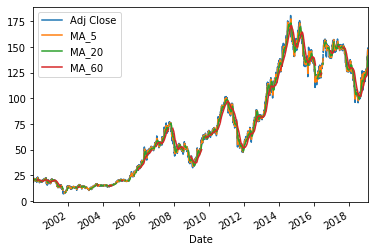

In [19]:
print('台股 ' + site[53: 57])
df.loc[:, 'Adj Close': 'MA_60'].plot();